# Homework II

### Grupo 003

(ist1107028) Inês Paredes

(ist1107137) Margarida Lourenço


## II. Programming [8v]

Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is
to predict a patient’s score on the Uniﬁed Parkinson’s Disease Rating Scale based on various
biomedical measurements.

To answer question 5), average the performance of the models over 10 separate runs. In each
run, use a diﬀerent 80-20 train-test split by setting a random_state=i, with i=1..10.

**5) [2v] Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10
neurons each and no activation functions, and another MLP Regressor with 2 hidden
layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the
MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.**

/home/paguedes/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paguedes/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paguedes/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paguedes/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paguedes/.local/lib/python3.10/sit

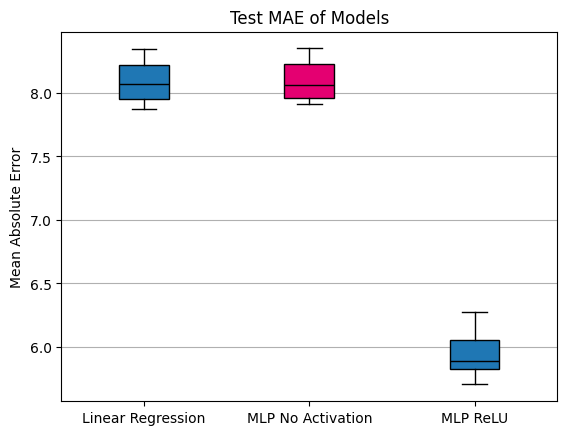

In [6]:
import matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

# Read the dataset
df = pd.read_csv("./parkinsons.csv")
X, y = df.drop("target", axis=1), df["target"]

linear_mae = []

# Linear Regression
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    y_pred = lr_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    linear_mae.append(mae)

mlp_no_activation_mae = []

# mlps with no activation function
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', 
                                     random_state=0, validation_fraction=0.2)
    mlp_no_activation.fit(X_train, y_train)
    
    y_pred = mlp_no_activation.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mlp_no_activation_mae.append(mae)

mlp_relu_mae = []

# mlps with ReLU activation function
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', 
                            random_state=0, validation_fraction=0.2)
    mlp_relu.fit(X_train, y_train)
    
    y_pred = mlp_relu.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mlp_relu_mae.append(mae)

# Data for plotting
b_plot = plt.boxplot(
    [linear_mae, mlp_no_activation_mae, mlp_relu_mae], patch_artist=True, 
    labels=['Linear Regression', 'MLP No Activation', 'MLP ReLU']
)

colors = ["#1f77b4", "#E40071"]
for patch, color in zip(b_plot["boxes"], colors):
    patch.set_facecolor(color)
for median in b_plot["medians"]:
    median.set_color("black")
# Create boxplot
plt.title('Test MAE of Models')
plt.ylabel('Mean Absolute Error')
plt.grid(axis="y")
plt.show()


**6) [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact
and the importance of using activation functions in a MLP. Support your reasoning with the
results from the boxplots.**

As we can see in the previous plot, the MLP without activation functions behaves similarly to Linear Regression, while the MLP with ReLU activation function performs better than the other two models.
Linear Regression and MLP without activation functions have a high MAE, centered around 8.0. On the other hand, the MLP with ReLU activation function has a lower MAE, centered around 6.0 and this shows the power of activation functions.
Activation functions enable the MLP to learn from non-linear relationships in the data. Without them, each layer is just performing a linear operation, which severely limits the network's ability to generalize and fit real-world data, especially when the underlying relationships are complex or non-linear.

**7. [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the
hyperparameters of an MLP regressor with two hidden layers (size 10 each). The
parameters to search over are: (i) L2 penalty, with the values {0.0001, 0.001, 0.01}; (ii)
learning rate, with the values {0.001, 0.01, 0.1}; and (iii) batch size, with the values
{32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the
best combination, and discuss the trade-oﬀs between the combinations.**

/home/margarida/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/margarida/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/margarida/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/margarida/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/margarida/.local/lib/python3.1

Test MAE: 4.335293325591352
Best Hyperparameters: {'alpha': 0.0001, 'batch_size': 64, 'learning_rate_init': 0.01}


/home/margarida/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


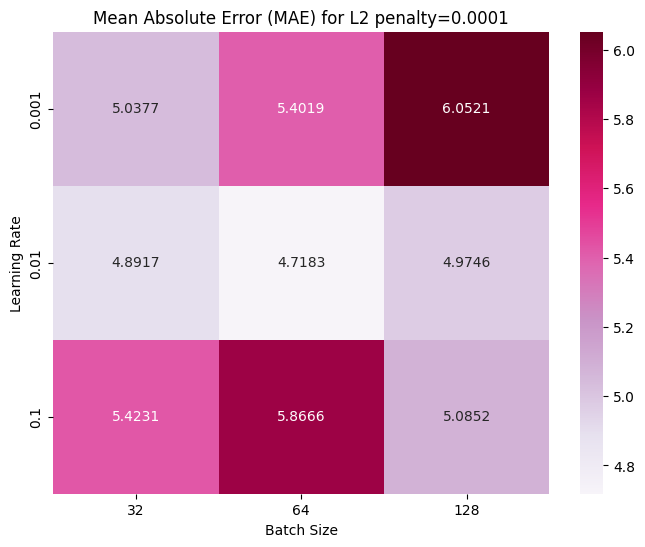

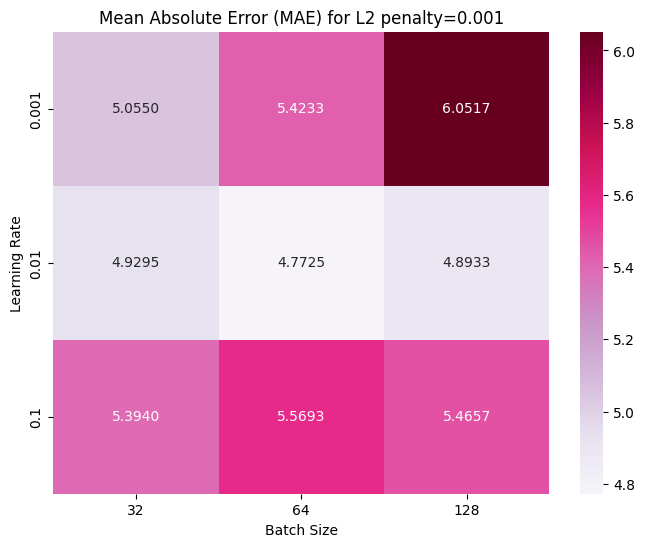

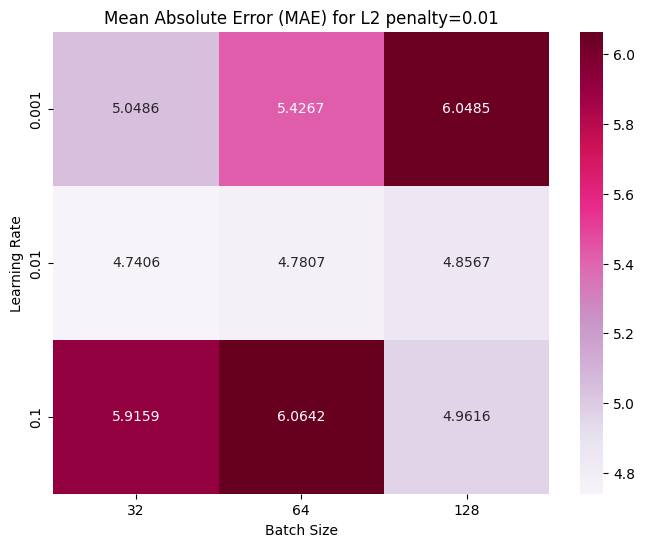

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Assuming the file is named 'parkinsons.csv')
data = pd.read_csv('parkinsons.csv')

# Separating features and target
df = pd.read_csv("./parkinsons.csv")
X, y = df.drop("target", axis=1), df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the MLPRegressor with two hidden layers (size 10 each)
mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0)

# Define the hyperparameters to search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128],  # Batch size
}

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {test_mae}")
print(f"Best Hyperparameters: {best_params}")

# Visualize the test MAE for each combination of hyperparameters, grouped by 'alpha'
results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_mae'] = -results['mean_test_score']  # Convert to positive MAE

# Plot a heatmap for each value of alpha
alphas = results['param_alpha'].unique()

for alpha in alphas:
    subset = results[results['param_alpha'] == alpha]
    pivot_table = subset.pivot(index='param_learning_rate_init', columns='param_batch_size', values='mean_test_mae')
    
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="PuRd", ax=ax)
    plt.title(f'Mean Absolute Error (MAE) for L2 penalty={alpha}')
    plt.xlabel('Batch Size')
    plt.ylabel('Learning Rate')
    plt.show()


When analizing MAE values, the smaller the MAE the better the models performance. With that being said, the best combination for each heatmap is:
- Learning Rate = 0.01 and Batch Size = 64 for L2 penalty = 0.0001
- Learning Rate = 0.01 and Batch Size = 64 for L2 penalty = 0.001
- Learning Rate = 0.01 and Batch Size = 32 for L2 penalty = 0.01

The best combination of hyperparameters for the MLP regressor, achieving the lowest Mean Absolute Error (MAE) of 4.7183, consists of an L2 penalty (alpha) of 0.0001, a learning rate of 0.01, and a batch size of 64. Lower alphas help avoid over-penalizing the model, while the 0.01 learning rate offers a good balance between convergence speed and avoiding overshooting. Batch size 64 provides the best generalization. Higher alphas and learning rates led to higher errors due to over-regularization and poor convergence.